## Decision Tree Classification

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris
iris_load = load_iris()
iris = pd.DataFrame(iris_load.data, columns= iris_load.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


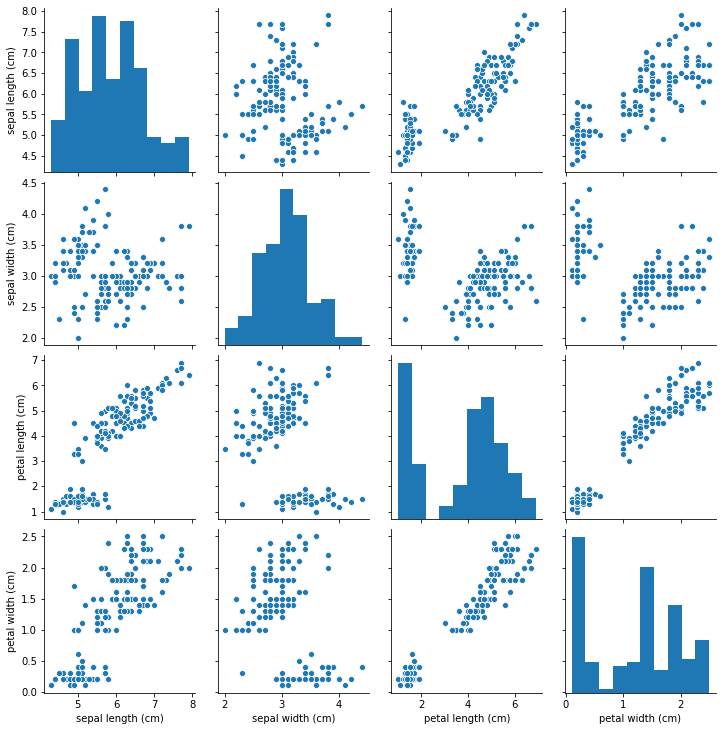

In [2]:
sns.pairplot(iris)

In [3]:
[col for col in iris.columns]
iris['class'] = pd.Series(iris_load.target)
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


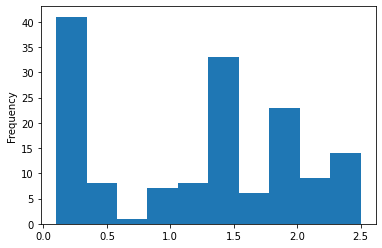

In [4]:
iris['petal width (cm)'].plot.hist()
plt.show()

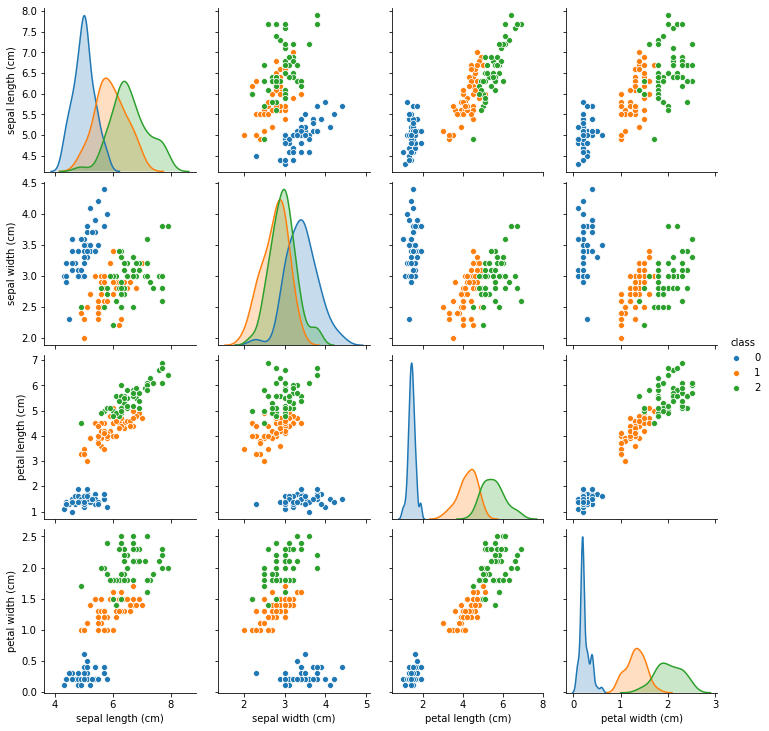

In [6]:
sns.pairplot(iris,hue='class')

In [7]:
#try classifyinf the class of iris using the features and assign to features
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# features = ['petal length (cm)', 'petal width (cm)']

In [8]:
# define the target as 'class' and assign to flower class
flower_class =['class']

In [9]:
x= iris[features]

In [11]:
y= iris[flower_class]


In [12]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object

In [13]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [16]:
#Try to classify using Decision Tree Classifier first
# you can go back and try with DTClass_Gini or DTClass_Entropy
# But remember to do the same for the .fit and .score. abd also comment out the other ones

DTClass = DecisionTreeClassifier()

#DTClass_Gini = DecisionTreeClassifier(criterion ='gini',random_state =100, max_depth=5,samples_leaf=7)
#DTClass_Entropy = DecisionTreeClassifier(criterion ='entropy',random_state =100, max_depth=5,samples_leaf=7)

DTClass.fit(x_train,y_train)
#DTClass.Gini.fit(x_train,y_train)
#DTClass.Entropy(x_train,y_train)

DecisionTreeClassifier()

In [17]:
# Lets see how well our model does in predicting the classes on the input data
y_pred = DTClass.predict(x_test)
#y_pred = DTClass.Gini.predict(x_test)
#y_pred = DTClass_Entropy.predict(x_test)

In [39]:
#Now lets look at how important each input predictor or feature is in classifying the Iris classes

prediction_importance = list(DTClass.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features,prediction_importance)]
[print('For feature {} Relatice Importance is {}'.format(*rows)) for rows in sorted(input_importance)];

For feature petal width (cm) Relatice Importance is 0.08035984628124608
For feature sepal length (cm) Relatice Importance is 0.008059486687455018
For feature sepal width (cm) Relatice Importance is 0.0335811945310626


In [26]:
# Now lets look at how well our model did using different metrics 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Decisions Trees for Regression

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
iris_load = load_iris()
iris = pd.DataFrame(iris_load.data, columns =iris_load.feature_names)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']

In [29]:
x = iris[features]

In [52]:
y = iris[flower_class]

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [55]:
regressor.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [56]:
y_pred = regressor.predict(x_test)

In [57]:
from sklearn.model_selection import cross_val_score
score = regressor.score(x_test, y_test)
print(score)

1.0


In [58]:
score = cross_val_score(regressor,x_test,y_test,cv=10)
print(score)

[ 1.          1.         -0.33333333  1.          1.          1.
  0.63636364  1.          1.         -0.5       ]


In [59]:
from sklearn import metrics 
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error is: 0.0


In [60]:
prediction_importance = list(regressor.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features,prediction_importance)]
[print('For feature {} Relatice Importance is {}'.format(*rows)) for rows in sorted(input_importance)];


For feature petal length (cm) Relatice Importance is 0.032027979066022734
For feature petal width (cm) Relatice Importance is 0.9613053542673106
For feature sepal length (cm) Relatice Importance is 0.0
For feature sepal width (cm) Relatice Importance is 0.006666666666666657


## Random Forest


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
iris_load= load_iris()
iris = pd.DataFrame(iris_load.data, columns=iris_load.feature_names)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
iris['class'] = pd.Series(iris_load.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [43]:
flower_class =['class']


In [44]:
x=iris[features]

In [45]:
y=iris[flower_class]

In [46]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier

#create a model with 100 trees

RFC = RandomForestClassifier(n_estimators=100, bootstrap= True, max_features ='sqrt')

In [48]:
RFC.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt')

In [49]:
y_pred = RFC.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [51]:
prediction_importance =list(RFC.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features,prediction_importance)]
[print('For feature {} Relatice Importance is {}'.format(*rows)) for rows in sorted(input_importance)];

For feature petal length (cm) Relatice Importance is 0.4490912529883518
For feature petal width (cm) Relatice Importance is 0.4318622104556742
For feature sepal length (cm) Relatice Importance is 0.09230298420563791
For feature sepal width (cm) Relatice Importance is 0.02674355235033618
